# Time Series

---

Created on 2019-05-24

Update on 2019-05-25

Author: Jiacheng

Github: https://github.com/Jiachengciel/Data_Analysis

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib notebook

---

## 1. Date and Time Data Types and Tools
## 日期和时间数据类型及工具

In [3]:
now = datetime.now()
now

datetime.datetime(2019, 5, 24, 20, 34, 55, 375004)

In [8]:
now.year, now.month, now.day

(2019, 5, 24)

In [14]:
delta = datetime(2019,10,16) - datetime(2019,9,14,12,30)
delta

datetime.timedelta(31, 41400)

In [15]:
delta.days

31

In [16]:
delta.seconds

41400

In [17]:
from datetime import timedelta

In [18]:
start = datetime(2019,5,22)
start + timedelta(12)

datetime.datetime(2019, 6, 3, 0, 0)

In [19]:
start - 2*timedelta(4)

datetime.datetime(2019, 5, 14, 0, 0)

* ### 字符串和datetime的相互转换

In [23]:
stamp = datetime(2019,5,24,21,53,22)
str(stamp)

'2019-05-24 21:53:22'

In [25]:
# 将时间转为字符串
stamp.strftime('%Y-%m-%d, :%w')

'2019-05-24, week:5'

In [29]:
# 将字符串转为时间
value = '2019-05-24 21:23:22'
datetime.strptime(value, "%Y-%m-%d %H:%M:%S")

datetime.datetime(2019, 5, 24, 21, 23, 22)

In [30]:
datestrs = ['7/7/2022', '6/4/2033']

In [31]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2022, 7, 7, 0, 0), datetime.datetime(2033, 6, 4, 0, 0)]

In [32]:
from dateutil.parser import parse

In [33]:
parse(value)

datetime.datetime(2019, 5, 24, 21, 23, 22)

In [35]:
parse(datestrs[0])

datetime.datetime(2022, 7, 7, 0, 0)

In [36]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [37]:
# 法语时间转换 (日在前)
parse('6/12/2012', dayfirst=True)

datetime.datetime(2012, 12, 6, 0, 0)

In [38]:
pd.to_datetime(datestrs)

DatetimeIndex(['2022-07-07', '2033-06-04'], dtype='datetime64[ns]', freq=None)

In [40]:
# 可以处理缺失值（None、空字符串等）
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2022-07-07', '2033-06-04', 'NaT'], dtype='datetime64[ns]', freq=None)

In [41]:
pd.isnull(idx)

array([False, False,  True])

---

## 2. Time Series Basics
## 时间序列基础

In [42]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [44]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.749213
2011-01-05   -1.251453
2011-01-07    0.260048
2011-01-08   -1.209823
2011-01-10    0.966039
2011-01-12    0.577342
dtype: float64

In [45]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [46]:
ts + ts[::2]

2011-01-02   -1.498427
2011-01-05         NaN
2011-01-07    0.520097
2011-01-08         NaN
2011-01-10    1.932077
2011-01-12         NaN
dtype: float64

In [47]:
ts[::2]

2011-01-02   -0.749213
2011-01-07    0.260048
2011-01-10    0.966039
dtype: float64

In [48]:
# datetime64数据类型以纳秒形式存储时间戳
ts.index.dtype

dtype('<M8[ns]')

In [49]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

* ### 索引、选取、子集构造

In [50]:
ts[stamp]

-0.7492134699643734

In [51]:
ts['1/10/2011']

0.9660386951090641

In [52]:
ts['20110110']

0.9660386951090641

In [53]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    1.414754
2000-01-02   -1.649033
2000-01-03    0.370279
2000-01-04   -0.017020
2000-01-05    1.699716
2000-01-06   -0.282524
2000-01-07   -1.213512
2000-01-08    0.517558
2000-01-09   -1.416052
2000-01-10    0.970632
2000-01-11    1.021684
2000-01-12   -0.404504
2000-01-13    0.690965
2000-01-14    0.122309
2000-01-15   -0.110744
2000-01-16   -0.509067
2000-01-17    0.564909
2000-01-18   -0.346988
2000-01-19   -1.946213
2000-01-20   -0.749713
2000-01-21    2.706861
2000-01-22    0.267854
2000-01-23   -1.725678
2000-01-24    1.059867
2000-01-25   -1.816758
2000-01-26    0.757713
2000-01-27    0.408359
2000-01-28    0.662216
2000-01-29    0.567927
2000-01-30   -1.130735
                ...   
2002-08-28    1.330663
2002-08-29   -0.078021
2002-08-30    0.678289
2002-08-31    0.346193
2002-09-01    0.825817
2002-09-02   -0.058521
2002-09-03    0.321812
2002-09-04    0.792513
2002-09-05    0.676490
2002-09-06   -0.570551
2002-09-07   -0.091276
2002-09-08   -0.318706
2002-09-09 

In [54]:
longer_ts['2001']

2001-01-01    1.111406
2001-01-02    0.915124
2001-01-03   -1.192863
2001-01-04    0.539039
2001-01-05    0.534574
2001-01-06   -0.553234
2001-01-07   -0.106109
2001-01-08   -0.801423
2001-01-09    0.665296
2001-01-10   -0.591913
2001-01-11    1.346858
2001-01-12   -1.326738
2001-01-13    0.688294
2001-01-14   -1.069012
2001-01-15   -0.262390
2001-01-16    1.002606
2001-01-17   -1.036942
2001-01-18   -1.676646
2001-01-19    2.384419
2001-01-20    1.495779
2001-01-21    0.708219
2001-01-22    1.257924
2001-01-23    0.168115
2001-01-24    0.361763
2001-01-25   -1.878366
2001-01-26    1.017998
2001-01-27    1.152794
2001-01-28    1.164169
2001-01-29   -0.594082
2001-01-30   -0.004903
                ...   
2001-12-02    0.753186
2001-12-03    0.764384
2001-12-04    1.047229
2001-12-05    0.633832
2001-12-06    0.128939
2001-12-07   -0.538282
2001-12-08   -1.990220
2001-12-09    0.850463
2001-12-10   -0.814233
2001-12-11    0.765570
2001-12-12    0.277187
2001-12-13   -0.982946
2001-12-14 

In [56]:
longer_ts['2001-10']

2001-10-01   -0.074808
2001-10-02   -0.895283
2001-10-03   -0.424031
2001-10-04    1.059479
2001-10-05    0.095160
2001-10-06   -0.370243
2001-10-07   -1.033803
2001-10-08    0.299366
2001-10-09    1.349765
2001-10-10    0.086255
2001-10-11   -0.626680
2001-10-12   -0.298238
2001-10-13   -0.134869
2001-10-14   -0.216471
2001-10-15   -0.172224
2001-10-16    1.829977
2001-10-17   -1.319769
2001-10-18    1.143113
2001-10-19    0.454013
2001-10-20   -0.261370
2001-10-21   -0.991677
2001-10-22    0.255920
2001-10-23    0.232754
2001-10-24    0.866532
2001-10-25    0.786895
2001-10-26   -1.158657
2001-10-27   -0.648966
2001-10-28   -0.044730
2001-10-29   -0.286047
2001-10-30    0.150069
2001-10-31    0.163963
Freq: D, dtype: float64

In [57]:
ts['20110107':]

2011-01-07    0.260048
2011-01-08   -1.209823
2011-01-10    0.966039
2011-01-12    0.577342
dtype: float64

In [59]:
# 除去2011-01-07之后的日期
ts.truncate(after='01/07/2011')

2011-01-02   -0.749213
2011-01-05   -1.251453
2011-01-07    0.260048
dtype: float64

In [60]:
# 选取星期三
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['2001-05']

,Colorado,Texas,New York,Ohio
2001-05-02,0.752680,0.579645,0.853143,0.381457
2001-05-09,0.630215,1.023626,-1.126651,-0.824568
2001-05-16,-1.395418,-0.751142,-0.242988,0.566470
2001-05-23,0.145933,0.499219,-1.207261,-0.091429
2001-05-30,0.869496,-0.181453,0.289050,1.649062


* ### 带有重复索引的时间序列

In [63]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [64]:
dup_ts.index.is_unique

False

In [65]:
# 对这个时间序列进行索引，要么产生标量值，要么产生切片
dup_ts['1/3/2000']

4

In [66]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [67]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [71]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

---

## 3. Date Ranges, Frequencies, and Shifting
##  日期的范围、频率以及移动

In [72]:
ts

2011-01-02   -0.749213
2011-01-05   -1.251453
2011-01-07    0.260048
2011-01-08   -1.209823
2011-01-10    0.966039
2011-01-12    0.577342
dtype: float64

In [74]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

* ### 生成日期范围

In [76]:
index = pd.date_range('2019-05-01', '2019-10-01')
index

DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08',
               '2019-05-09', '2019-05-10',
               ...
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29',
               '2019-09-30', '2019-10-01'],
              dtype='datetime64[ns]', length=154, freq='D')

In [77]:
pd.date_range(start='2019-05-01', periods=20)

DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08',
               '2019-05-09', '2019-05-10', '2019-05-11', '2019-05-12',
               '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-18', '2019-05-19', '2019-05-20'],
              dtype='datetime64[ns]', freq='D')

In [78]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [79]:
# 由每月最后一天工作日组成工作表
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [80]:
# 保留时间信息
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

* ### 频率和日期偏移量

In [81]:
from pandas.tseries.offsets import Hour, Minute

In [82]:
# 基础频率
Hour()

<Hour>

In [83]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [84]:
pd.date_range('2019-05-01', '2019-05-03 23:59', freq='4h')

DatetimeIndex(['2019-05-01 00:00:00', '2019-05-01 04:00:00',
               '2019-05-01 08:00:00', '2019-05-01 12:00:00',
               '2019-05-01 16:00:00', '2019-05-01 20:00:00',
               '2019-05-02 00:00:00', '2019-05-02 04:00:00',
               '2019-05-02 08:00:00', '2019-05-02 12:00:00',
               '2019-05-02 16:00:00', '2019-05-02 20:00:00',
               '2019-05-03 00:00:00', '2019-05-03 04:00:00',
               '2019-05-03 08:00:00', '2019-05-03 12:00:00',
               '2019-05-03 16:00:00', '2019-05-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [85]:
# 偏移量连接
Hour(2) + Minute(30)

<150 * Minutes>

In [87]:
pd.date_range('2019-05-01', periods=10, freq='1h30min')

DatetimeIndex(['2019-05-01 00:00:00', '2019-05-01 01:30:00',
               '2019-05-01 03:00:00', '2019-05-01 04:30:00',
               '2019-05-01 06:00:00', '2019-05-01 07:30:00',
               '2019-05-01 09:00:00', '2019-05-01 10:30:00',
               '2019-05-01 12:00:00', '2019-05-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

* ### WOM日期

In [89]:
# WOM: Week of Month
# 每月第3个星期五
rng = pd.date_range('2019-05-01', '2019-10-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2019-05-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2019-06-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2019-07-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2019-08-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2019-09-20 00:00:00', freq='WOM-3FRI')]

* ### 移动（超前和滞后）数据

In [90]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -1.009883
2000-02-29   -1.196689
2000-03-31    0.506215
2000-04-30   -2.053910
Freq: M, dtype: float64

In [91]:
# 沿着时间轴后移2个单位
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.009883
2000-04-30   -1.196689
Freq: M, dtype: float64

In [92]:
ts.shift(-2)

2000-01-31    0.506215
2000-02-29   -2.053910
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [93]:
ts.shift(2, freq='M')

2000-03-31   -1.009883
2000-04-30   -1.196689
2000-05-31    0.506215
2000-06-30   -2.053910
Freq: M, dtype: float64

In [94]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -1.009883
2000-02-29 01:30:00   -1.196689
2000-03-31 01:30:00    0.506215
2000-04-30 01:30:00   -2.053910
Freq: M, dtype: float64

* ### 通过偏移量对日期进行位移

In [95]:
from pandas.tseries.offsets import Day, MonthEnd

In [96]:
now = datetime.now()

In [97]:
now + 3*Day()

Timestamp('2019-05-27 23:13:40.526208')

In [98]:
now + MonthEnd()

Timestamp('2019-05-31 23:13:40.526208')

In [99]:
now + MonthEnd(2)

Timestamp('2019-06-30 23:13:40.526208')

In [100]:
# 将日期向前滚动
MonthEnd().rollforward(now)

Timestamp('2019-05-31 23:13:40.526208')

In [101]:
MonthEnd().rollback(now)

Timestamp('2019-04-30 23:13:40.526208')

In [103]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2010', periods=20, freq='4d'))
ts

2010-01-15   -2.162407
2010-01-19    1.757370
2010-01-23   -1.293891
2010-01-27    0.181824
2010-01-31    2.679535
2010-02-04   -1.184269
2010-02-08    0.141408
2010-02-12   -0.613679
2010-02-16   -0.707096
2010-02-20   -1.231995
2010-02-24   -0.038748
2010-02-28    0.558356
2010-03-04   -0.010173
2010-03-08    0.303960
2010-03-12   -0.356645
2010-03-16   -0.126117
2010-03-20    1.587933
2010-03-24   -0.021499
2010-03-28    0.656183
2010-04-01    1.437475
Freq: 4D, dtype: float64

In [104]:
ts.groupby(MonthEnd().rollforward).mean()

2010-01-31    0.232486
2010-02-28   -0.439432
2010-03-31    0.290521
2010-04-30    1.437475
dtype: float64

In [105]:
ts.resample('M').mean()

2010-01-31    0.232486
2010-02-28   -0.439432
2010-03-31    0.290521
2010-04-30    1.437475
Freq: M, dtype: float64

---

## 4. Time Zone Handling
## 时区处理

In [106]:
import pytz

In [107]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [109]:
# 获取时区对象
pytz.timezone('America/New_York')

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [120]:
pytz.timezone('Asia/Shanghai')

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

In [114]:
pytz.timezone('Europe/Paris')

<DstTzInfo 'Europe/Paris' LMT+0:09:00 STD>

In [121]:
pytz.country_timezones('cn')

['Asia/Shanghai', 'Asia/Urumqi']

* ### 时区本地化和转换

In [132]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.444426
2012-03-10 09:30:00   -1.133764
2012-03-11 09:30:00   -0.868395
2012-03-12 09:30:00    0.562004
2012-03-13 09:30:00    1.510253
2012-03-14 09:30:00    0.612502
Freq: D, dtype: float64

In [133]:
# 时区索引字段
print(ts.index.tz)

None


In [134]:
pd.date_range('3/9/2019 9:30', periods=10, freq='D', tz='UTC')


DatetimeIndex(['2019-03-09 09:30:00+00:00', '2019-03-10 09:30:00+00:00',
               '2019-03-11 09:30:00+00:00', '2019-03-12 09:30:00+00:00',
               '2019-03-13 09:30:00+00:00', '2019-03-14 09:30:00+00:00',
               '2019-03-15 09:30:00+00:00', '2019-03-16 09:30:00+00:00',
               '2019-03-17 09:30:00+00:00', '2019-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [136]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.444426
2012-03-10 09:30:00+00:00   -1.133764
2012-03-11 09:30:00+00:00   -0.868395
2012-03-12 09:30:00+00:00    0.562004
2012-03-13 09:30:00+00:00    1.510253
2012-03-14 09:30:00+00:00    0.612502
Freq: D, dtype: float64

In [137]:
# 转换时区
ts_utc.tz_convert('Asia/Shanghai')

2012-03-09 17:30:00+08:00   -1.444426
2012-03-10 17:30:00+08:00   -1.133764
2012-03-11 17:30:00+08:00   -0.868395
2012-03-12 17:30:00+08:00    0.562004
2012-03-13 17:30:00+08:00    1.510253
2012-03-14 17:30:00+08:00    0.612502
Freq: D, dtype: float64

In [138]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

* ### 操作时区意识型Timestamp对象

In [143]:
stamp = pd.Timestamp('2019/05/24 23:20')
stamp_shanghai = stamp.tz_localize('Asia/Shanghai')
stamp_shanghai

Timestamp('2019-05-24 23:20:00+0800', tz='Asia/Shanghai')

In [144]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [148]:
# 自UNIX纪元（1970年1月1日）算起的纳秒数
stamp_utc = stamp.tz_localize('utc')
stamp_utc.value

1558740000000000000

In [150]:
stamp_utc.tz_convert('America/New_York').value

1558740000000000000

In [152]:
stamp_shanghai + Hour()

Timestamp('2019-05-25 00:20:00+0800', tz='Asia/Shanghai')

In [153]:
stamp_shanghai

Timestamp('2019-05-24 23:20:00+0800', tz='Asia/Shanghai')

* ### 不同时区之间的运算

In [154]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.845802
2012-03-08 09:30:00    2.623630
2012-03-09 09:30:00   -0.379471
2012-03-12 09:30:00   -0.783258
2012-03-13 09:30:00   -2.282556
2012-03-14 09:30:00    1.407283
2012-03-15 09:30:00   -0.482514
2012-03-16 09:30:00    1.783822
2012-03-19 09:30:00   -0.446622
2012-03-20 09:30:00    0.144134
Freq: B, dtype: float64

In [155]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Asia/Shanghai')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

---

## 5. Periods and Period Arithmetic
## 时期及其算术运算

In [2]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [6]:
p + 5

Period('2012', 'A-DEC')

In [7]:
pd.Period('2000', freq='A-DEC') - p

<-7 * YearEnds: month=12>

In [8]:
# 创建时期范围
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [9]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换

In [10]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [11]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [12]:
# 以一月为中间点
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [13]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [14]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [15]:
# “2007年8月”实际上是属于周期“2008年”
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [16]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.779028
2007    0.213783
2008    0.300929
2009   -1.133711
Freq: A-DEC, dtype: float64

In [17]:
ts.asfreq('M', how='end')

2006-12   -1.779028
2007-12    0.213783
2008-12    0.300929
2009-12   -1.133711
Freq: M, dtype: float64

In [18]:
# 每年的时期被取代为每月的时期
ts.asfreq('B', how='end')

2006-12-29   -1.779028
2007-12-31    0.213783
2008-12-31    0.300929
2009-12-31   -1.133711
Freq: B, dtype: float64

### 按季度计算的时期频率

In [19]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [20]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [27]:
# 最后一个工作日            一天开始的时间
p.asfreq('B', 'e').asfreq('T','s')

Period('2012-01-31 00:00', 'T')

In [21]:
# 获取该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [22]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [23]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [24]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### 将Timestamp转换为Period（及其反向过程）

In [28]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.003628
2000-02-29   -0.868098
2000-03-31   -0.241764
Freq: M, dtype: float64

In [29]:
pts = ts.to_period()
pts

2000-01    0.003628
2000-02   -0.868098
2000-03   -0.241764
Freq: M, dtype: float64

In [30]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.029031
2000-01-30   -0.109979
2000-01-31    0.989958
2000-02-01    0.006228
2000-02-02    0.764125
2000-02-03   -0.678329
Freq: D, dtype: float64

In [31]:
ts2.to_period('M')

2000-01    1.029031
2000-01   -0.109979
2000-01    0.989958
2000-02    0.006228
2000-02    0.764125
2000-02   -0.678329
Freq: M, dtype: float64

In [32]:
pts = ts2.to_period()
pts

2000-01-29    1.029031
2000-01-30   -0.109979
2000-01-31    0.989958
2000-02-01    0.006228
2000-02-02    0.764125
2000-02-03   -0.678329
Freq: D, dtype: float64

In [33]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    1.029031
2000-01-30 23:59:59.999999999   -0.109979
2000-01-31 23:59:59.999999999    0.989958
2000-02-01 23:59:59.999999999    0.006228
2000-02-02 23:59:59.999999999    0.764125
2000-02-03 23:59:59.999999999   -0.678329
Freq: D, dtype: float64

### 通过数组创建PeriodIndex

In [34]:
data = pd.read_csv('../examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [36]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [38]:
data.index = index
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


---

## 6. Resampling and Frequency Conversion
## 重采样及频率转换

将高频率数据聚合到低频率称为降采样（downsampling)

而将低频率数据转换到高频率则称为升采样（upsampling)

In [40]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head(10)

2000-01-01    0.503121
2000-01-02   -1.183775
2000-01-03    1.320232
2000-01-04   -1.397830
2000-01-05    0.733615
2000-01-06   -0.275536
2000-01-07    1.416958
2000-01-08   -1.576434
2000-01-09    1.501262
2000-01-10   -1.570654
Freq: D, dtype: float64

In [43]:
ts.resample('M').mean()

2000-01-31   -0.179746
2000-02-29    0.340605
2000-03-31    0.115619
2000-04-30    0.012475
Freq: M, dtype: float64

In [44]:
ts.resample('M', kind='period').mean()

2000-01   -0.179746
2000-02    0.340605
2000-03    0.115619
2000-04    0.012475
Freq: M, dtype: float64

### 降采样

In [45]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [46]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [47]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [49]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [50]:
# 从右界减去1秒
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### OHLC重采样

计算各面元的四个值：第一个值（open，开盘）

最后一个值（close，收盘）

最大值（high，最高）

最小值（low，最低）

In [51]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 升采样和插值

In [52]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                          freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame


,Colorado,Texas,New York,Ohio
2000-01-05,0.047193,0.224650,-0.374791,-0.170626
2000-01-12,-0.739186,0.680727,0.769470,-0.635999


In [53]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.047193,0.224650,-0.374791,-0.170626
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.739186,0.680727,0.769470,-0.635999


In [54]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.047193,0.224650,-0.374791,-0.170626
2000-01-06,0.047193,0.224650,-0.374791,-0.170626
2000-01-07,0.047193,0.224650,-0.374791,-0.170626
2000-01-08,0.047193,0.224650,-0.374791,-0.170626
2000-01-09,0.047193,0.224650,-0.374791,-0.170626
2000-01-10,0.047193,0.224650,-0.374791,-0.170626
2000-01-11,0.047193,0.224650,-0.374791,-0.170626
2000-01-12,-0.739186,0.680727,0.769470,-0.635999


In [55]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.047193,0.224650,-0.374791,-0.170626
2000-01-13,-0.739186,0.680727,0.769470,-0.635999


### 通过时期进行重采样

In [56]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]


,Colorado,Texas,New York,Ohio
2000-01,1.398218,-0.398042,-0.524194,0.974618
2000-02,-0.693806,1.401392,-0.813661,-0.971900
2000-03,0.421340,1.224563,-1.900921,0.982213
2000-04,-1.060009,-0.214893,2.102701,-0.910654
2000-05,-1.368980,-1.824955,-2.082457,-0.325680


In [58]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.136132,-0.276906,-0.317856,-0.09236
2001,0.008199,0.711989,-0.130963,-0.07900


In [60]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.136132,-0.276906,-0.317856,-0.09236
2000Q2,-0.136132,-0.276906,-0.317856,-0.09236
2000Q3,-0.136132,-0.276906,-0.317856,-0.09236
2000Q4,-0.136132,-0.276906,-0.317856,-0.09236
2001Q1,0.008199,0.711989,-0.130963,-0.07900
2001Q2,0.008199,0.711989,-0.130963,-0.07900
2001Q3,0.008199,0.711989,-0.130963,-0.07900
2001Q4,0.008199,0.711989,-0.130963,-0.07900


In [61]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.136132,-0.276906,-0.317856,-0.09236
2001Q1,-0.136132,-0.276906,-0.317856,-0.09236
2001Q2,-0.136132,-0.276906,-0.317856,-0.09236
2001Q3,-0.136132,-0.276906,-0.317856,-0.09236
2001Q4,0.008199,0.711989,-0.130963,-0.07900


---

## 7. Moving Window Functions
##  移动窗口函数

In [63]:
close_px_all = pd.read_csv('../examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px_all[:10]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [66]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px[:10]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


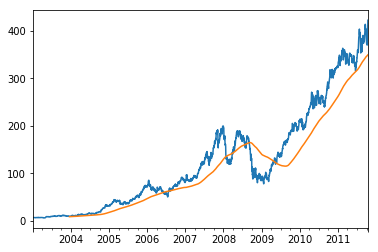

In [67]:
# 创建一个按照250天分组的滑动窗口对象
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [68]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

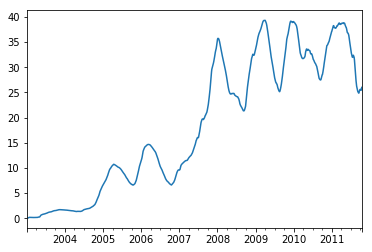

In [69]:
appl_std250.plot()

扩展窗口平均（expanding window mean）

从时间序列的起始处开始窗口，增加窗口直到它超过所有的序列

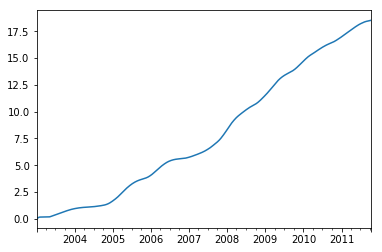

In [71]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean.plot()

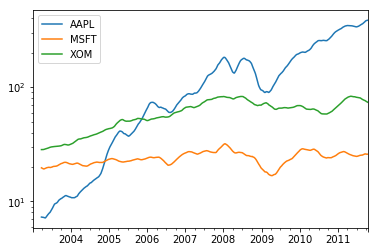

In [72]:
close_px.rolling(60).mean().plot(logy=True)

In [75]:
# 以接受一个指定固定大小时间补偿字符串
close_px.rolling('20D').mean()[:10]

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### 指数加权函数

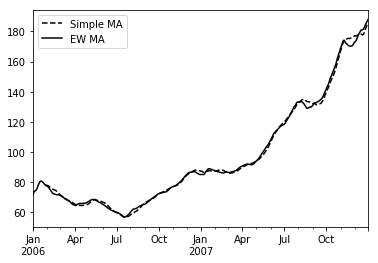

In [76]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()


### 二元移动窗口函数

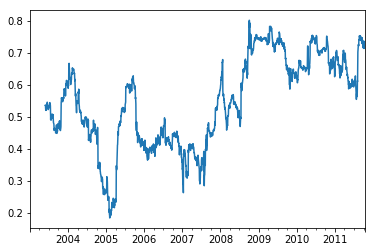

In [77]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

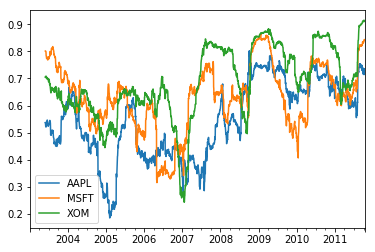

In [78]:
# 计算多只股票与标准普尔500指数的相关系数
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 用户定义的移动窗口函数

In [79]:
from scipy.stats import percentileofscore

/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


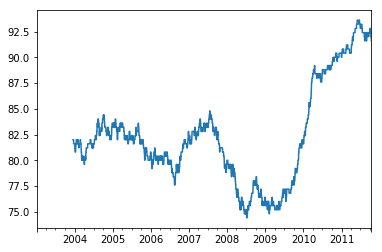

In [80]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()